In [ ]:
%pip install pandas matplotlib seaborn numpy scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  


df = pd.read_csv("penguins_size.csv")

# knowledge stage

In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.sample()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE


In [7]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [8]:
df.select_dtypes(include='object')

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


# data cleaning

In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
df.isna().mean()

species              0.000000
island               0.000000
culmen_length_mm     0.005814
culmen_depth_mm      0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.029070
dtype: float64

In [11]:
df = df.dropna(axis=0)

In [12]:
df.duplicated().sum()

0

In [13]:
df = df.replace('.', 'unknown')

# Data analysis

## Analyzing the data, we can see that Biscoe Island has the highest diversity of penguin species

In [14]:
species_by_island = df.groupby('island')['species'].count()
species_by_island

island
Biscoe       164
Dream        123
Torgersen     47
Name: species, dtype: int64

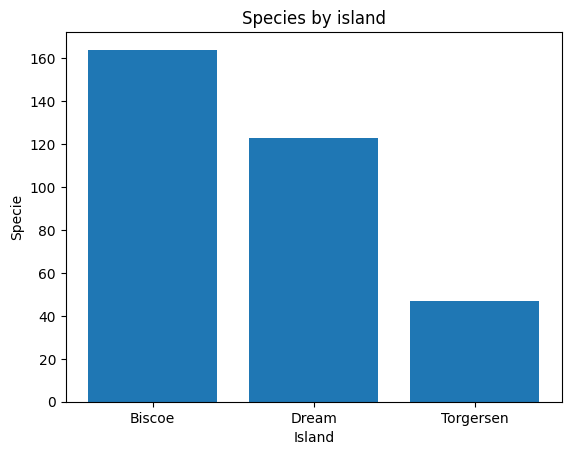

In [15]:
plt.bar(species_by_island.index, species_by_island.values)
plt.title('Species by island')
plt.xlabel('Island')
plt.ylabel('Specie')
plt.show()


## Mean body mass by gender

In [16]:
mean_body_mass_g_by_sex = df.groupby('sex')['body_mass_g'].mean()
mean_body_mass_g_by_sex

sex
FEMALE     3862.272727
MALE       4545.684524
unknown    4875.000000
Name: body_mass_g, dtype: float64

In [17]:
median_body_mass_g = df['body_mass_g'].median()
median_body_mass_g

4050.0

In [18]:
std_body_mass_g = df['body_mass_g'].std()
std_body_mass_g

804.836129253923

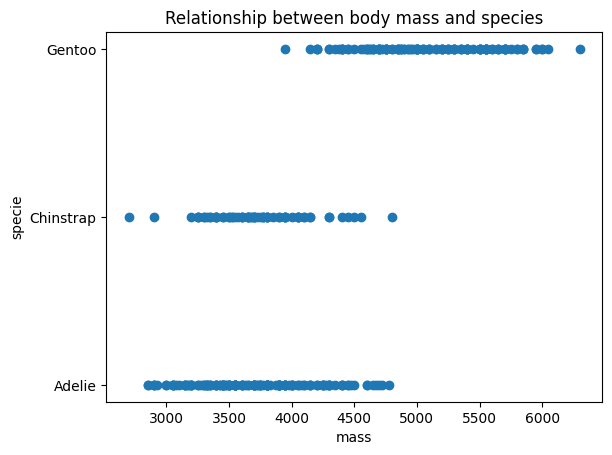

In [19]:
plt.scatter(df['body_mass_g'], df['species'])
plt.title('Relationship between body mass and species')
plt.xlabel('mass')
plt.ylabel('specie')
plt.show()

In [20]:
le = LabelEncoder()

In [21]:
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])
df['species'] = le.fit_transform(df['species'])

In [22]:
correlation_matrix = df.corr()
correlation_matrix

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.623595,0.729262,-0.740803,0.851351,0.751020,0.021527
island,-0.623595,1.000000,-0.337009,0.568885,-0.555759,-0.560518,-0.020316
culmen_length_mm,0.729262,-0.337009,1.000000,-0.228640,0.652126,0.589066,0.340377
culmen_depth_mm,-0.740803,0.568885,-0.228640,1.000000,-0.578730,-0.472987,0.360896
flipper_length_mm,0.851351,-0.555759,0.652126,-0.578730,1.000000,0.873211,0.261430
body_mass_g,0.751020,-0.560518,0.589066,-0.472987,0.873211,1.000000,0.426309
sex,0.021527,-0.020316,0.340377,0.360896,0.261430,0.426309,1.000000


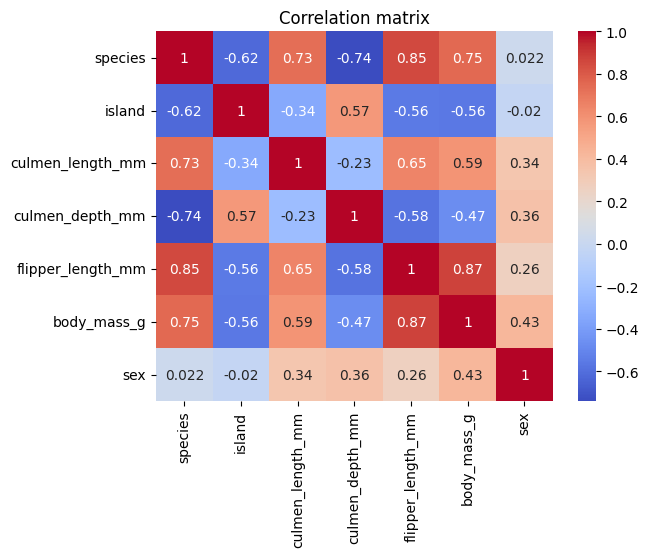

In [23]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()
